## Importing the data

In [1]:
import pandas as pd
import re
import numpy as np
from operator import add
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

data_2015=pd.read_excel('data/CANDYDATA-2015.xlsx')
data_2016=pd.read_excel('data/CANDYDATA-2016.xlsx')
#data_2017=pd.read_excel('data/CANDYDATA-2017.xlsx')

In [2]:
pd.set_option('display.max_columns', 500)

I do not include the 2017 data because, while available, it is not in raw form. I will consider only 2015 and 2016 data.

## Inspecting the Raw Data

In [3]:
data_2015.head()

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],[Box’o’ Raisins],[Brach products (not including candy corn)],[Bubble Gum],[Cadbury Creme Eggs],[Candy Corn],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Candy that is clearly just the stuff given out for free at restaurants],"[Cash, or other forms of legal tender]",[Chiclets],[Caramellos],[Snickers],[Dark Chocolate Hershey],[Dental paraphenalia],[Dots],[Fuzzy Peaches],[Generic Brand Acetaminophen],[Glow sticks],[Broken glow stick],[Goo Goo Clusters],[Good N' Plenty],[Gum from baseball cards],[Gummy Bears straight up],[Creepy Religious comics/Chick Tracts],[Healthy Fruit],[Heath Bar],[Hershey’s Kissables],[Hershey’s Milk Chocolate],[Hugs (actual physical hugs)],[Jolly Rancher (bad flavor)],[Jolly Ranchers (good flavor)],[Kale smoothie],[Kinder Happy Hippo],[Kit Kat],[Hard Candy],[Lapel Pins],[LemonHeads],[Licorice],[Licorice (not black)],[Lindt Truffle],[Lollipops],[Mars],[Mary Janes],[Maynards],[Milk Duds],[LaffyTaffy],[Minibags of chips],[JoyJoy (Mit Iodine)],[Reggie Jackson Bar],[Pixy Stix],[Nerds],[Nestle Crunch],[Now'n'Laters],[Pencils],[Milky Way],[Reese’s Peanut Butter Cups],[Tolberone something or other],[Runts],[Junior Mints],[Senior Mints],[Mint Kisses],[Mint Juleps],[Mint Leaves],[Peanut M&M’s],[Regular M&Ms],[Mint M&Ms],[Ribbon candy],[Rolos],[Skittles],[Smarties (American)],[Smarties (Commonwealth)],[Chick-o-Sticks (we don’t know what that is)],[Spotted Dick],[Starburst],[Swedish Fish],[Sweetums],[Those odd marshmallow circus peanut things],[Three Musketeers],[Peterson Brand Sidewalk Chalk],[Peanut Butter Bars],[Peanut Butter Jars],[Trail Mix],[Twix],[Vicodin],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Please leave any remarks or comments regarding your choices.,Please list any items not included above that give you JOY.,Please list any items not included above that give you DESPAIR.,Guess the number of mints in my hand.,Betty or Veronica?,"Check all that apply: ""I cried tears of sadness at the end of ____________""","""That dress* that went viral early this year - when I first saw it, it was ________""","Fill in the blank: ""Taylor Swift is a force for ___________""",What is your favourite font?,"If you squint really hard, the words ""Intelligent Design"" would look like.","Fill in the blank: ""Imitation is a form of ____________""",Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"[Sea-salt flavored stuff, probably chocolate, since this is the ""it"" flavor of the year]",[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separati

In [4]:
data_2016.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers (the candy)],[Bonkers (the board game)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],[Butterfinger],[Cadbury Creme Eggs],[Candy Corn],[Candy that is clearly just the stuff given out for free at restaurants],[Caramellos],"[Cash, or other forms of legal tender]",[Chardonnay],[Chick-o-Sticks (we don’t know what that is)],[Chiclets],[Coffee Crisp],[Creepy Religious comics/Chick Tracts],[Dental paraphenalia],[Dots],[Dove Bars],[Fuzzy Peaches],[Generic Brand Acetaminophen],[Glow sticks],[Goo Goo Clusters],[Good N' Plenty],[Gum from baseball cards],[Gummy Bears straight up],[Hard Candy],[Healthy Fruit],[Heath Bar],[Hershey's Dark Chocolate],[Hershey’s Milk Chocolate],[Hershey's Kisses],[Hugs (actual physical hugs)],[Jolly Rancher (bad flavor)],[Jolly Ranchers (good flavor)],[JoyJoy (Mit Iodine!)],[Junior Mints],[Senior Mints],[Kale smoothie],[Kinder Happy Hippo],[Kit Kat],[LaffyTaffy],[LemonHeads],[Licorice (not black)],[Licorice (yes black)],[Lindt Truffle],[Lollipops],[Mars],[Mary Janes],[Maynards],[Mike and Ike],[Milk Duds],[Milky Way],[Regular M&Ms],[Peanut M&M’s],[Blue M&M's],[Red M&M's],[Third Party M&M's],[Minibags of chips],[Mint Kisses],[Mint Juleps],[Mr. Goodbar],[Necco Wafers],[Nerds],[Nestle Crunch],[Now'n'Laters],[Peeps],[Pencils],[Person of Interest Season 3 DVD Box Set (not including Disc 4 with hilarious outtakes)],[Pixy Stix],[Reese’s Peanut Butter Cups],[Reese's Pieces],[Reggie Jackson Bar],[Rolos],[Skittles],[Smarties (American)],[Smarties (Commonwealth)],[Snickers],[Sourpatch Kids (i.e. abominations of nature)],[Spotted Dick],[Starburst],[Sweet Tarts],[Swedish Fish],[Sweetums (a friend to diabetes)],[Tic Tacs],[Those odd marshmallow circus peanut things],[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Please list any items not included above that give you JOY.,Please list any items not included above that give you DESPAIR.,"Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.",Guess the number of mints in my hand.,Betty or Veronica?,"""That dress* that went viral a few years back - when I first saw it, it was ________""",What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH

The 2015 and 2016 data contain non-candy related questions (ie, degrees of separtion), which do not interest me. I want to remove these, keeping only candy values and possible group-by values for group comparissons (ie, gender, age, location). Furthermore, there are close to 100 different kinds of candy on this list, which is simply not practical for the sake of visualization. I choose 12 of the most populat candies to focus on: Butterfinger, candy corn, snickers, hershey's milk choco, kit kat, milky way, reese's peanut butter cups, m&m (Regular), Skittles, three musketeers, twix, york peppermint patties.

There are a fair number of missing values, which may or may not skew the data if removed. Furthermore, while it seems candy ratings were done on a multiple choice basis (containing choices "DESPAIR", "MEH", and "JOY"), other options were fill-able. This means that different expressions indicating USA, CA, or various states, will have to be combined. I also note that there are several values for age which should be replaced with NaN (ie, one which lists "Really Old" and another with ~10 digits).

The table is also in an inconvenient form. A table indicating the ratings of different candy (perhaps within different country, age, gender groups) would be more useful.

## Filtering Extraneous Columns

As mentioned above, I will keep only columns with candy ratings (for the twelve candies mentioned) and possible group-by values. The 2016 data has more group-by options, whereas the 2015 survey only asked for age. I also add a year column so that I can combine both years into one dataframe. I don't expect to see much change in candy preferences in one year, so I will use data from both years together.

In [5]:
df15=(data_2015[["How old are you?"," [Butterfinger]"," [Candy Corn]"," [Snickers]"," [Hershey’s Milk Chocolate]",
                " [Kit Kat]"," [Milky Way]"," [Reese’s Peanut Butter Cups]"," [Regular M&Ms]"," [Skittles]",
                " [Three Musketeers]"," [Twix]"," [York Peppermint Patties]"]]).assign(Year=2015)
df16=(data_2016[["How old are you?","Your gender:","Which country do you live in?"," [Butterfinger]"," [Candy Corn]",
                " [Snickers]"," [Hershey’s Milk Chocolate]"," [Kit Kat]"," [Milky Way]"," [Reese’s Peanut Butter Cups]",
                " [Regular M&Ms]"," [Skittles]"," [Three Musketeers]"," [Twix]"," [York Peppermint Patties]"]]).assign(Year=2016)

In [6]:
col_names = {"How old are you?":"Age","Your gender:":"Gender","Which country do you live in?":"Country",
                " [Butterfinger]":"Butterfinger"," [Candy Corn]":"Candy Corn"," [Snickers]":"Snickers",
                " [Hershey’s Milk Chocolate]":"Hershey's Milk Chocolate"," [Kit Kat]":"Kit Kat"," [Milky Way]":"Milky Way",
                " [Reese’s Peanut Butter Cups]":"Reese's Peanut Butter Cups"," [Regular M&Ms]":"Regular M&Ms"," [Skittles]":"Skittles",
                " [Three Musketeers]":"Three Musketeers"," [Twix]":"Twix"," [York Peppermint Patties]":"York Peppermint Patties"}
df = (df16.append(df15, sort=False)
        .rename(columns=col_names)
        .reset_index(drop=True))
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

## Homogenizing Data

## Ages

### Removing Weird Ages

I choose to simply remove the rows that have non-int or impossible age values rather than marking them NA; social scientists will often us this method of weeding out people who are not taking the survery seriously.

In [7]:
df = df.loc[df.Age.apply(lambda x: isinstance(x, int))]
df = df.loc[(df.Age<100) & (df.Age>5)]

### Age Quantiles

Next, I split the ages into quantile groups.

In [8]:
# quartiles = df.Age.quantile([.25,.5,.75,1])

# age1 = range(0,int(quartiles[.25])+1)
# age2 = range(int(quartiles[.25])+1,int(quartiles[.5])+1)
# age3 = range(int(quartiles[.5])+1,int(quartiles[.75])+1)
# age4 = range(int(quartiles[.75])+1,int(quartiles[1])+1)

# for age in age1:
#     df['Age']=df['Age'].replace(age, '0 to 30')
# for age in age2:
#     df['Age']=df['Age'].replace(age, '31 to 36')
# for age in age3:
#     df['Age']=df['Age'].replace(age, '37 to 45')
# for age in age4:
#     df['Age']=df['Age'].replace(age, '46 to 99')

In [9]:
birth_years = df.Year - df.Age

gen=[]
for year in birth_years:
    if year >= 1996:
        gen=gen+["Gen Z"]
    elif year >= 1977:
        gen=gen+["Millenials"]
    elif year >= 1965:
        gen=gen+["Gen X"]
    elif year >= 1946:
        gen=gen+["Boomers"]
    elif year < 1946:
        gen=gen+["Silent"]
    else:
        print(year, "????????????????????????")
       
    
df["Generation"] = gen
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Generation,Year,Age,Gender,Country,Butterfinger,Candy Corn,Snickers,Hershey's Milk Chocolate,Kit Kat,Milky Way,Reese's Peanut Butter Cups,Regular M&Ms,Skittles,Three Musketeers,Twix,York Peppermint Patties
0,Millenials,2016,22,Male,Canada,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
1,Gen X,2016,45,Male,usa,JOY,DESPAIR,JOY,MEH,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY
2,Gen X,2016,48,Female,US,JOY,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY
3,Boomers,2016,57,Male,usa,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
4,Gen X,2016,42,Male,USA,JOY,DESPAIR,MEH,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH
5,Gen X,2016,41,Male,USA,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
6,Gen X,2016,47,Male,usa,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
7,Millenials,2016,28,Male,Canada,JOY,DESPAIR,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
8,Gen X,2016,44,Male,USA,MEH,DESPAIR,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY
9,Gen X,2016,41,Female,UK,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,JOY


## Genders

There were four possible choices for the gender question:

In [10]:
df.Gender.unique()

array(['Male', 'Female', 'Other', "I'd rather not say", nan], dtype=object)

I will keep 'Male', 'Female', and 'Other', but for this project no answer and the NaN values from the 2015 data (where this question did not exist) will serve the same purpose.

In [11]:
df = df.replace({'Gender': {"I'd rather not say": np.nan}})

## Country Codes

I want to replace all country labels with two-letter country codes. Since the country question was provided as a fill-in-the-blank, this requires some text matching.

In [12]:
df['Country'] = (df['Country'].str.replace('(Canada)|(CA\\s?)', "CA", case=False, regex=True)
                 .str.replace('(Canada)|(CA\\s?)', "CA", case=False, regex=True)
                 .str.replace('(\\s?u.?s.?a?.?\\s?)|(unit((ed)|s) st?(a|e)tes?( of america)?)|a?m(e|u)rica', "US", case=False, regex=True)
                 .str.replace('(\\s?u.?s.?a?.?\\s?)|(unit((ed)|s) st?(a|e)tes?( of america)?)|a?m(e|u)rica', "US", case=False, regex=True)
                 .str.replace('(uk\\s?)|(united king?dom( of great britain)?)|(england)', "UK", case=False, regex=True)
                 .str.replace('(the )?netherlands', "NL", case=False, regex=True)
                 .str.replace('france', "FR", case=False, regex=True)
                 .str.replace('switzerland', "CH", case=False, regex=True)
                 .str.replace('japan', "JP", case=False, regex=True)
                 .str.replace('(south )?korea', "KR", case=False, regex=True)
                 .str.replace('croatia', "HR", case=False, regex=True)
                 .str.replace('portugal', "PT", case=False, regex=True)
                 .str.replace('mexico', "MX", case=False, regex=True)
                 .str.replace('germany', "DE", case=False, regex=True)
                 .str.replace('(nz\\s?)|(new zealand)', "NZ", case=False, regex=True)
                 .str.replace('(nz\\s?)|(new zealand)', "NZ", case=False, regex=True)
                 .str.replace('belgium', "BE", case=False, regex=True)
                 .str.replace('panama', "PA", case=False, regex=True)
                 .str.replace('hungary', "HU", case=False, regex=True)
                 .str.replace('bra(z|s)il', "BR", case=False, regex=True)
                 .str.replace('philippines', "PH", case=False, regex=True)
                 .str.replace('sweden', "SE", case=False, regex=True)
                 .str.replace('finland', "FI", case=False, regex=True)
                 .str.replace('china', "CN", case=False, regex=True)
                 .str.replace('(spain)|(españa)', "ES", case=False, regex=True)
                 .str.replace('kenya', "KE", case=False, regex=True)
                 .str.replace('aus', "AU", case=False, regex=True))

I keep the NaN values for now, but will eliminate all country responses that don't fit into these categories (for much the same reason I removed the ages above). First I run the code and check to see which responses my filtering method will drop.

In [13]:
not_nan = df.Country[(df['Country'].notnull())]
drop_index = not_nan.index[df.Country[~(df['Country'].isna())].apply(lambda x: len(x))>2]
df.Country[drop_index]

89                        Neverland
274                            USUS
283                the best one -US
298                            USUS
411     there isn't one for old men
470        The Yoo Ess of Aaayyyyyy
651                            AUia
652                            AUia
727                           US!!!
802                             EUA
965                            AUia
997                            USUS
1124      The republic of CAsCAdia 
1157                           USUS
1186            United  States ofUS
Name: Country, dtype: object

The number of dropped values is very small compared to the total size of the data, and the values being dropped fit into my exclusion rule. While a few of these could be filtered into "US", I do not do this here because the responses could still indicate lack of serious intent and, regardless, the amount of data being lost through this process is very small.

In [14]:
df = df.drop(drop_index)
df.Country.unique()

array(['CA', 'US', 'UK', 'JP', 'FR', 'CH', 'KR', 'BE', 'HR', 'PT', 'ES',
       'PA', 'HU', nan, 'AU', 'NZ', 'DE', 'MX', 'BR', 'PH', 'SE', 'NL',
       'FI', 'CN', 'KE'], dtype=object)

# Parsing Ratings

Three values were allowed for each candy rating: "JOY", "MEH", and "DESPAIR". I replace these with 1, 0, -1 respectively.

In [15]:
df.head()

,Generation,Year,Age,Gender,Country,Butterfinger,Candy Corn,Snickers,Hershey's Milk Chocolate,Kit Kat,Milky Way,Reese's Peanut Butter Cups,Regular M&Ms,Skittles,Three Musketeers,Twix,York Peppermint Patties
0,Millenials,2016,22,Male,CA,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
1,Gen X,2016,45,Male,US,JOY,DESPAIR,JOY,MEH,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY
2,Gen X,2016,48,Female,US,JOY,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY
3,Boomers,2016,57,Male,US,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
4,Gen X,2016,42,Male,US,JOY,DESPAIR,MEH,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH


In [16]:
for col in range(5,17):
    df.iloc[:,col]=df.iloc[:,col].replace("JOY", 1)
    df.iloc[:,col]=df.iloc[:,col].replace("MEH", 0)
    df.iloc[:,col]=df.iloc[:,col].replace("DESPAIR", -1)

In [17]:
df=df.drop(['Year','Age'], axis=1)

In [18]:
#df.groupby(["Age","Country","Gender"]).mean()
df.loc[df['Country'].isin(['US','UK','CA'])].groupby(["Generation","Country","Gender"]).mean()

Butterfinger  Candy Corn  Snickers  \
Generation Country Gender                                       
Boomers    CA      Female      1.000000    0.000000  1.000000   
                   Male        0.333333   -0.555556  0.750000   
           UK      Male       -0.500000   -0.500000  0.500000   
           US      Female      0.553191    0.000000  0.565217   
                   Male        0.568966   -0.085470  0.655172   
Gen X      CA      Female      0.333333   -0.692308  0.692308   
                   Male        0.416667   -0.708333  0.800000   
           UK      Female      0.000000    0.000000  0.500000   
                   Male        1.000000    0.000000  1.000000   
           US      Female      0.277108   -0.253012  0.614458   
                   Male        0.534091   -0.125475  0.741313   
                   Other       0.500000   -0.500000  0.000000   
Gen Z      CA      Female      1.000000   -1.000000  1.000000   
                   Male        0.000000   -1.000000  0.000000   
           US      Female      0.562500    0.266667  0.600000   
                   Male        0.181818    0.272727  0.818182   
                   Other       0.000000   -1.000000  0.000000   
Millenials CA      Female      0.562500   -0.281250  0.562500   
                   Male        0.535714   -0.464286  0.500000   
           UK      Female      1.000000   -0.166667  1.000000   
                   Male       -0.200000    0.000000  0.400000   
           US      Female      0.476744    0.115607  0.701754   
                   Male        0.669421   -0.130612  0.716667   
                   Other       0.500000    0.500000  0.800000   
Silent     CA      Female      1.000000   -1.000000  1.000000   
           US      Female      1.000000    0.000000  1.000000   
                   Male       -0.500000   -0.500000  1.000000   

                           Hershey's Milk Chocolate   Kit Kat  Milky Way  \
Generation Country Gender                                                  
Boomers    CA      Female                  1.000000  1.000000   1.000000   
                   Male                    0.555556  0.777778   0.777778   
           UK      Male                   -0.500000  0.000000   0.500000   
           US      Female                  0.319149  0.659574   0.638298   
                   Male                    0.449153  0.706897   0.547009   
Gen X      CA      Female                  0.538462  0.923077   0.636364   
                   Male                    0.416667  0.840000   0.560000   
           UK      Female                 -0.500000  1.000000   1.000000   
                   Male                    0.250000  1.000000   1.000000   
           US      Female                  0.180723  0.662651   0.390244   
                   Male                    0.329545  0.776515   0.559387   
                   Other                  -0.500000  1.000000   0.500000   
Gen Z      CA      Female                  1.000000  1.000000   1.000000   
                   Male                    0.000000  0.000000   0.000000   
           US      Female                  0.666667  1.000000   0.733333   
                   Male                    0.636364  1.000000   0.300000   
                   Other                   0.000000  1.000000   1.000000   
Millenials CA      Female                  0.468750  0.750000   0.483871   
                   Male                    0.551724  0.827586   0.500000   
           UK      Female                  0.333333  1.000000   1.000000   
                   Male                   -0.600000  0.200000   0.800000   
           US      Female                  0.329480  0.748538   0.693642   
                   Male                    0.192623  0.757202   0.588477   
                   Other                   0.300000  0.700000   0.700000   
Silent     CA      Female                  0.000000  1.000000   1.000000   
           US      Female                  0.666667  0.666667   0.666667   
             

In [19]:
Candies = ["Butterfinger","Candy Corn",
                "Snickers","Hershey’s Milk Chocolate","Kit Kat","Milky Way","Reese’s Peanut Butter Cups",
                "Regular M&Ms","Skittles","Three Musketeers","Twix","York Peppermint Patties"]
df2=df.melt(id_vars=["Generation", "Country","Gender"], value_vars=Candies, var_name='Item',value_name='Rating')
df2.head()

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Generation,Country,Gender,Item,Rating
0,Millenials,CA,Male,Butterfinger,1.0
1,Gen X,US,Male,Butterfinger,1.0
2,Gen X,US,Female,Butterfinger,1.0
3,Boomers,US,Male,Butterfinger,1.0
4,Gen X,US,Male,Butterfinger,1.0


In [20]:
data_2017=pd.read_excel('data/CANDYDATA-2017.xlsx')
data_2017.sort_values(['ITEM']).head()

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
85,100 Grand Bar,570,34,536.0,1.390488,-34.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
82,Black Jacks,34,252,-218.0,0.658410,-252.0
81,Bonkers,31,99,-68.0,0.299277,-99.0


The pre-processed 2017 data has summed the JOY and DESPAIR ratings for each candy, subtracted DESPAIR from JOY to get NET FEELIES. At a glance, I'm not sure what they did to get NET CLOUT (and it's not recorded anywhere I can find), so I may come back to this later. Also, unfortunately, the 2017 data does not include Butterfingers, so for this portion I will drop Butterfingers from the 2015/2016 data.

In [21]:
df17 = data_2017.iloc[:,0:4]
df17.columns=(['Item','Joy','Despair','Net'])
df17=df17.sort_values(by=['Net'], ascending=False)

df17=df17.loc[df17['Item'].isin(Candies)]

In [22]:
df1516=df.drop(['Generation','Gender','Country','Butterfinger'], axis=1)
_df=pd.DataFrame()

for col in df1516.columns:
    _df[col]=df1516[col].value_counts().tolist()

df1516=_df.transpose()
df1516=df1516.drop(2,axis=1)
df1516=df1516.reset_index()
df1516.columns=['Item','Joy','Despair']
df1516['Net'] = df1516['Joy']-df1516['Despair']

In [23]:
df17=df17.sort_values(by=['Item'])
df1516=df1516.sort_values(by=['Item'])

data_total=pd.DataFrame()
data_total['Item']=df17['Item']
for col in df17.columns[1:4]:
    data_total[col]=list( map(add, df17[col], df1516[col]) )
data_total=data_total.sort_values(by=['Net'], ascending=False)

# Exploratory Analysis

Net feelies for all candies 2015-2017. Diverging bar plot

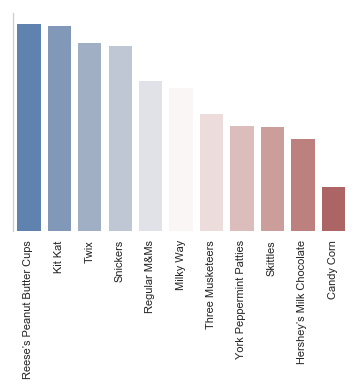

In [24]:
bar=sns.barplot(x=data_total.Item, y=data_total.Net, palette="vlag")
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
bar.set_ylabel('')    
bar.set_xlabel('')
bar.set(yticks=[])
sns.despine(bottom=True)

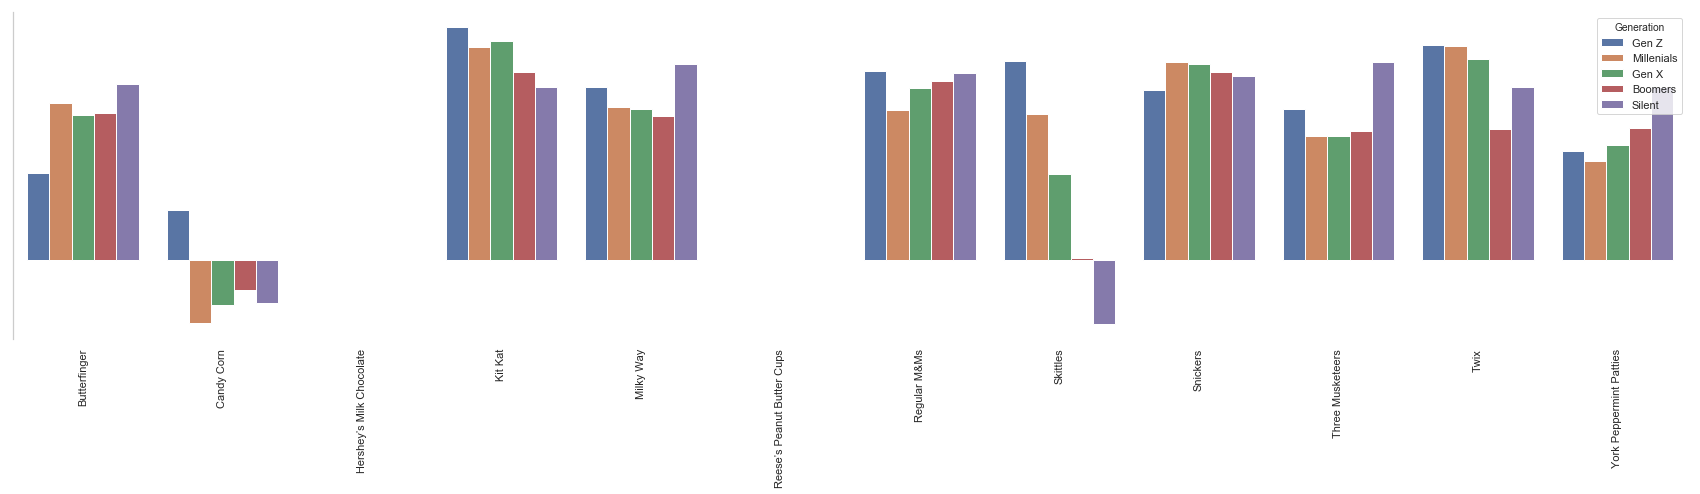

In [26]:
_df=df2.groupby(['Generation','Item']).agg({'Rating': np.nanmean}).reset_index()
plt.figure(figsize=(30, 6))
bar=sns.barplot(x=_df.Item, y=_df.Rating, hue=_df.Generation, hue_order=["Gen Z", "Millenials", "Gen X", "Boomers", "Silent"])
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
bar.set_ylabel('')    
bar.set_xlabel('')
bar.set(yticks=[])
sns.despine(bottom=True)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1062: RuntimeWarning: Mean of empty slice
  f = lambda x: func(x, *args, **kwargs)


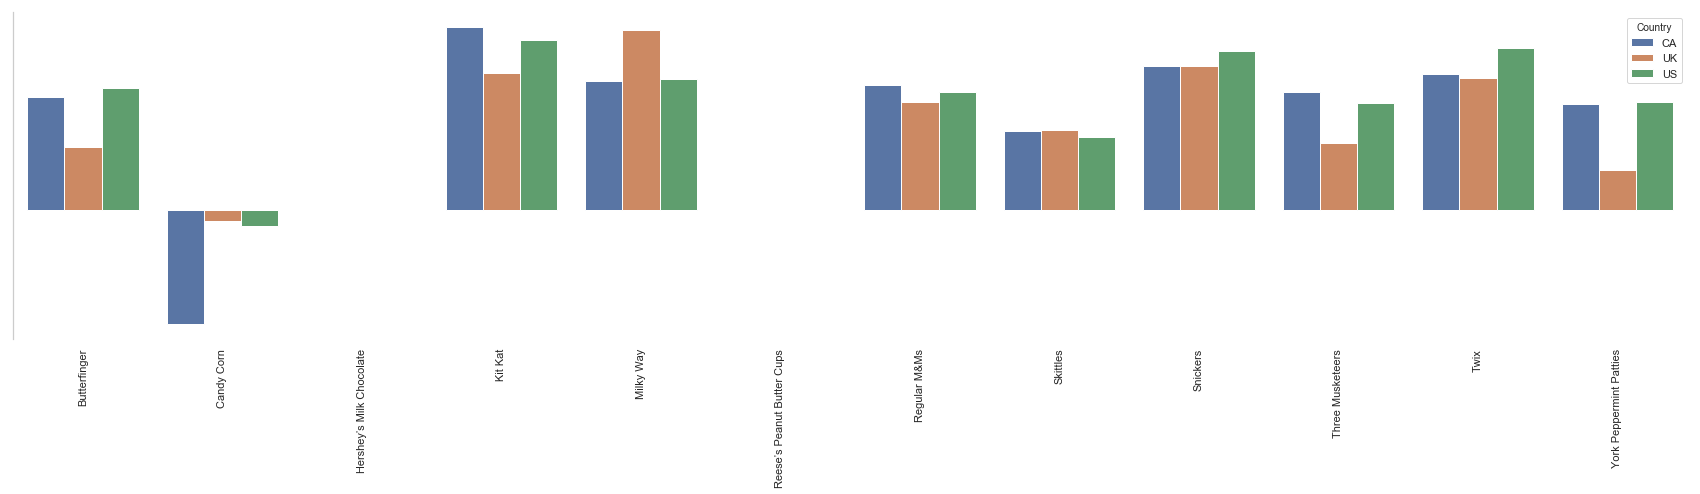

In [27]:
_df=(df2.loc[df2['Country'].isin(['US','UK','CA'])]
     .groupby(['Country','Item'])
     .agg({'Rating': np.nanmean})
     .reset_index())

plt.figure(figsize=(30, 6))
bar=sns.barplot(x=_df.Item, y=_df.Rating, hue=_df.Country)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
bar.set_ylabel('')    
bar.set_xlabel('')
bar.set(yticks=[])
sns.despine(bottom=True)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1062: RuntimeWarning: Mean of empty slice
  f = lambda x: func(x, *args, **kwargs)


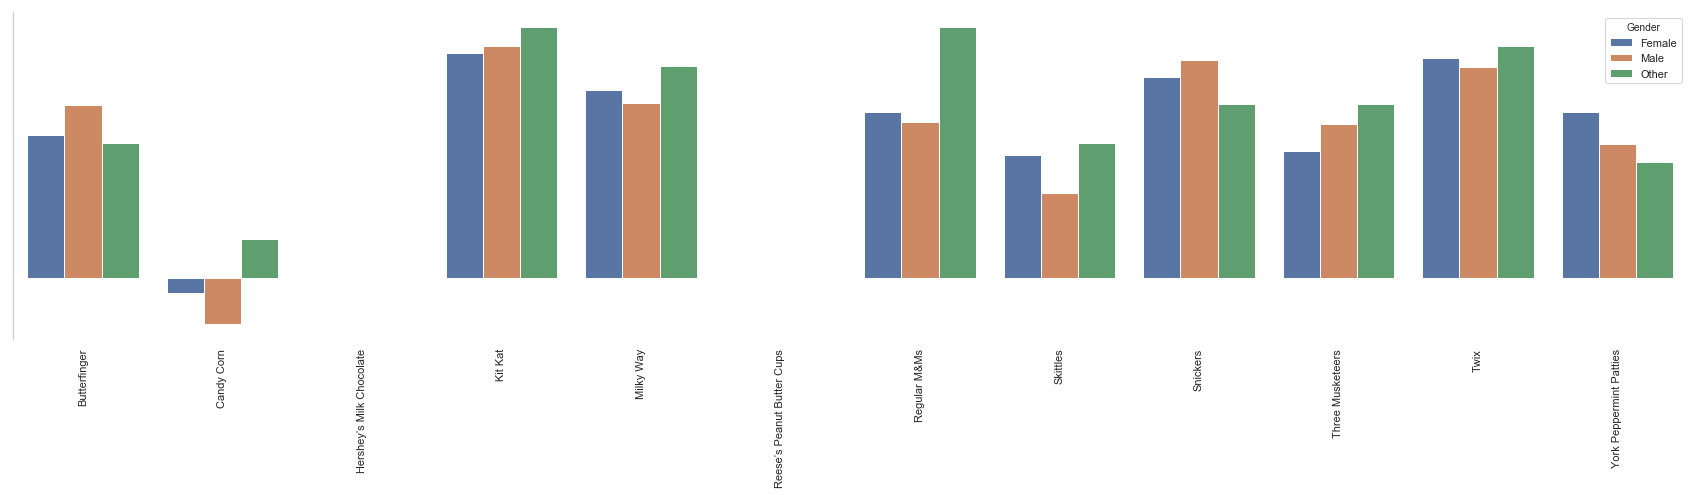

In [28]:
_df=(df2.groupby(['Gender','Item'])
     .agg({'Rating': np.nanmean})
     .reset_index())

plt.figure(figsize=(30, 6))
bar=sns.barplot(x=_df.Item, y=_df.Rating, hue=_df.Gender)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
bar.set_ylabel('')    
bar.set_xlabel('')
bar.set(yticks=[])
sns.despine(bottom=True)